In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("mls_salaries_masterlist.csv")
data

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference
0,Vancouver Whitecaps,Abdallah,Aminu,M,46500.0,46500.00,2013,Western
1,FC Dallas,Acosta,Kellyn,M,46500.0,70500.00,2013,Western
2,Vancouver Whitecaps,Adekugbe,Samuel,D,46500.0,51500.00,2013,Western
3,Toronto FC,Agbossoumonde,Gale,D,46500.0,53166.67,2013,Eastern
4,New England Revolution,Agudelo,Juan,F,145000.0,175000.00,2013,Eastern
...,...,...,...,...,...,...,...,...
10368,Vancouver Whitecaps,Scoaupssa e Silva,Caio Alexand,M,500000.0,562500.00,2022,Western
10369,Vancouver Whitecaps,Tceaibpesrt,Russell,M,400000.0,449375.00,2022,Western
10370,Vancouver Whitecaps,Vceaspeslinovic,Ranko,D,405000.0,490500.00,2022,Western
10371,Vancouver Whitecaps,Vcitaeps,Pedro,M,556000.0,609997.00,2022,Western


<function matplotlib.pyplot.show(close=None, block=None)>

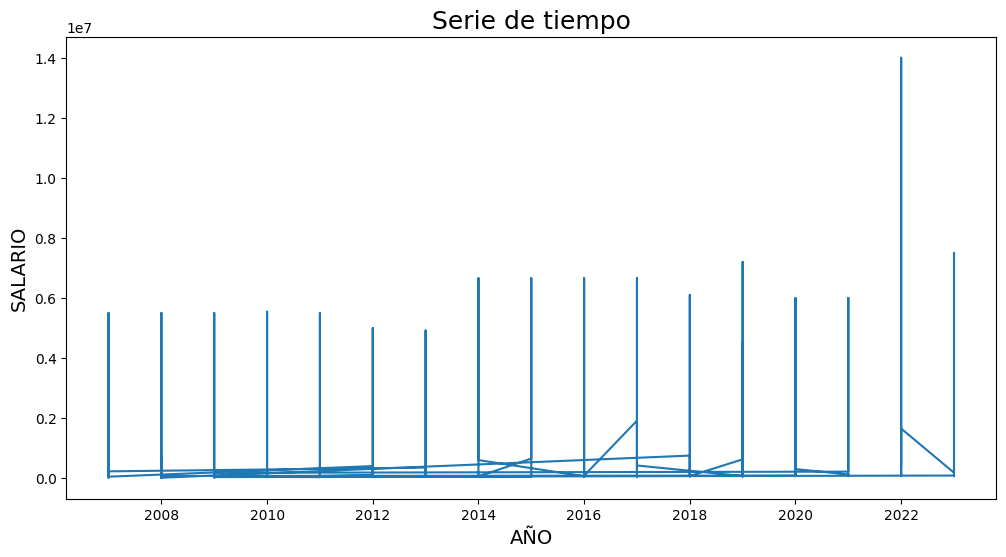

In [5]:
#Plotting 
plt.figure(figsize=(12,6))
plt.plot(data['year'], data['base_salary'])

plt.xlabel("AÑO", fontsize=14)
plt.ylabel("SALARIO", fontsize=14)
plt.title("Serie de tiempo", fontsize=18)
plt.show

Manipulando los datos

In [8]:
x = data.iloc[:, 4:7]
x

,base_salary,guaranteed_compensation,year
0,46500.0,46500.00,2013
1,46500.0,70500.00,2013
2,46500.0,51500.00,2013
3,46500.0,53166.67,2013
4,145000.0,175000.00,2013
...,...,...,...
10368,500000.0,562500.00,2022
10369,400000.0,449375.00,2022
10370,405000.0,490500.00,2022
10371,556000.0,609997.00,2022


In [10]:
#Datos Anuales
anual = x.groupby(by=['year']).sum().reset_index()
anual

,year,base_salary,guaranteed_compensation
0,2007,3.847833e+07,4.222366e+07
1,2008,4.292950e+07,4.729251e+07
2,2009,4.689920e+07,5.187805e+07
3,2010,6.410895e+07,7.130497e+07
4,2011,7.499108e+07,8.507948e+07
5,2012,8.649280e+07,9.925788e+07
6,2013,8.480920e+07,9.507814e+07
7,2014,1.166924e+08,1.295318e+08
8,2015,1.517671e+08,1.675697e+08
9,2016,1.610863e+08,1.758114e+08


<function matplotlib.pyplot.show(close=None, block=None)>

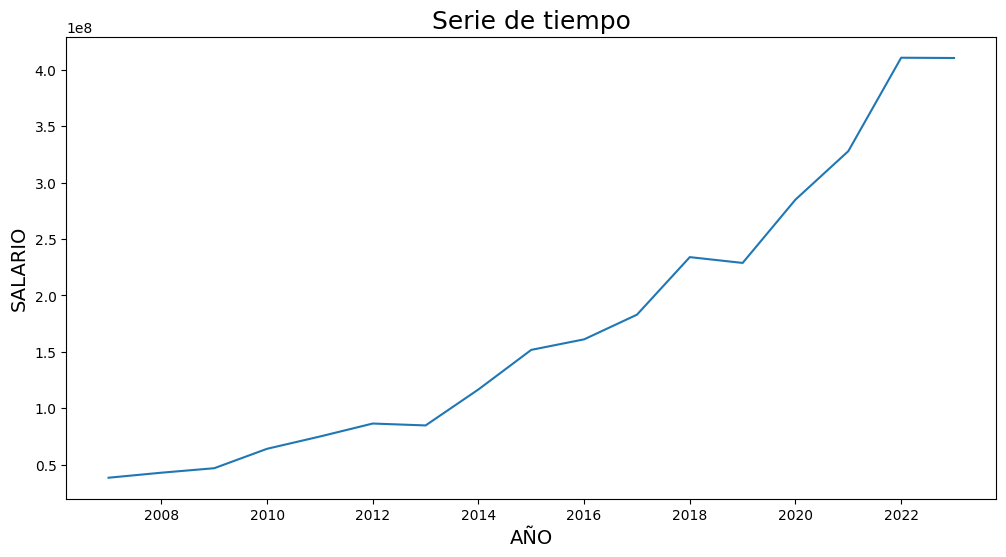

In [11]:
#Plotting 
plt.figure(figsize=(12,6))
plt.plot(anual['year'], anual['base_salary'])

plt.xlabel("AÑO", fontsize=14)
plt.ylabel("SALARIO", fontsize=14)
plt.title("Serie de tiempo", fontsize=18)
plt.show

Media Movil

In [13]:
#Promedio
anual['MA'] = anual['base_salary'].rolling(window=3).mean().shift(1)
anual

,year,base_salary,guaranteed_compensation,MA
0,2007,3.847833e+07,4.222366e+07,NaN
1,2008,4.292950e+07,4.729251e+07,NaN
2,2009,4.689920e+07,5.187805e+07,NaN
3,2010,6.410895e+07,7.130497e+07,4.276901e+07
4,2011,7.499108e+07,8.507948e+07,5.131255e+07
5,2012,8.649280e+07,9.925788e+07,6.199974e+07
6,2013,8.480920e+07,9.507814e+07,7.519761e+07
7,2014,1.166924e+08,1.295318e+08,8.209769e+07
8,2015,1.517671e+08,1.675697e+08,9.599813e+07
9,2016,1.610863e+08,1.758114e+08,1.177562e+08


<function matplotlib.pyplot.show(close=None, block=None)>

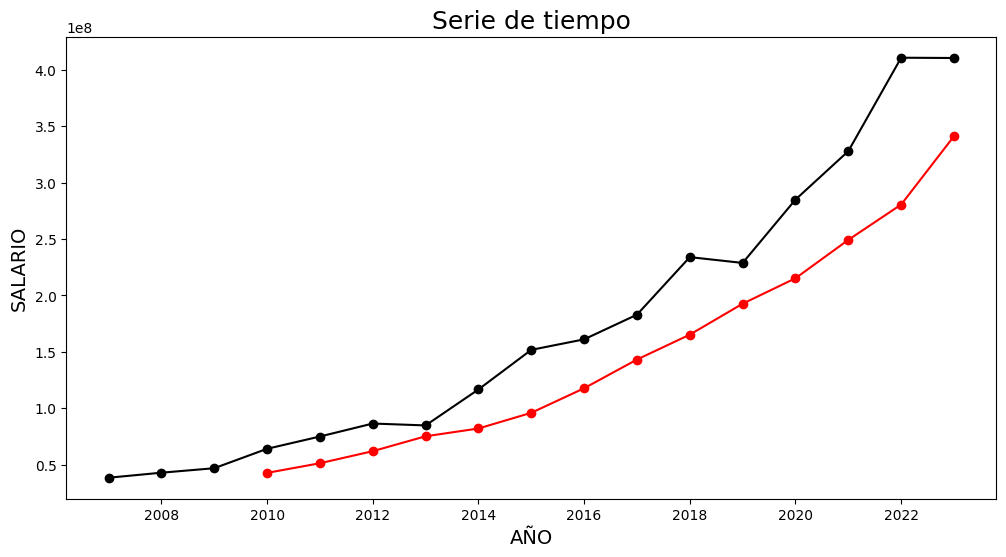

In [18]:
#Plotting 
plt.figure(figsize=(12,6))
plt.plot(anual['year'], anual['base_salary'], '-o', color='black', label='data')
plt.plot(anual['year'], anual['MA'], '-o', color='red', label='forecast')

plt.xlabel("AÑO", fontsize=14)
plt.ylabel("SALARIO", fontsize=14)
plt.title("Serie de tiempo", fontsize=18)
plt.show

In [22]:
#Agregar nueva fila 
anual.loc[len(anual)]=[int(anual.iloc[len(anual)-1][0])+1, 0, 0, 0]
anual

,year,base_salary,guaranteed_compensation,MA
0,2007,3.847833e+07,4.222366e+07,NaN
1,2008,4.292950e+07,4.729251e+07,NaN
2,2009,4.689920e+07,5.187805e+07,NaN
3,2010,6.410895e+07,7.130497e+07,4.276901e+07
4,2011,7.499108e+07,8.507948e+07,5.131255e+07
5,2012,8.649280e+07,9.925788e+07,6.199974e+07
6,2013,8.480920e+07,9.507814e+07,7.519761e+07
7,2014,1.166924e+08,1.295318e+08,8.209769e+07
8,2015,1.517671e+08,1.675697e+08,9.599813e+07
9,2016,1.610863e+08,1.758114e+08,1.177562e+08


In [23]:
anual['MA'] = anual['base_salary'].rolling(window=3).mean().shift(1)

anual['year'] = anual['year'].astype(int)
anual['base_salary'] = anual['base_salary'].astype(float)
anual['MA'] = anual['MA'].astype(float)
anual

,year,base_salary,guaranteed_compensation,MA
0,2007,3.847833e+07,4.222366e+07,NaN
1,2008,4.292950e+07,4.729251e+07,NaN
2,2009,4.689920e+07,5.187805e+07,NaN
3,2010,6.410895e+07,7.130497e+07,4.276901e+07
4,2011,7.499108e+07,8.507948e+07,5.131255e+07
5,2012,8.649280e+07,9.925788e+07,6.199974e+07
6,2013,8.480920e+07,9.507814e+07,7.519761e+07
7,2014,1.166924e+08,1.295318e+08,8.209769e+07
8,2015,1.517671e+08,1.675697e+08,9.599813e+07
9,2016,1.610863e+08,1.758114e+08,1.177562e+08


<function matplotlib.pyplot.show(close=None, block=None)>

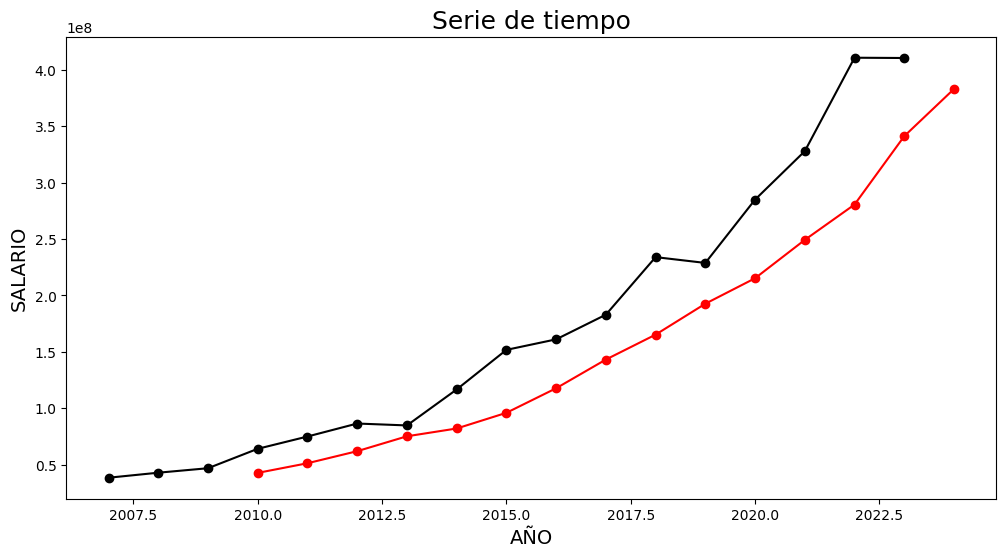

In [26]:
#Plotting 
plt.figure(figsize=(12,6))
plt.plot(anual['year'][:-1], anual['base_salary'][:-1], '-o', color='black', label='data')
plt.plot(anual['year'], anual['MA'], '-o', color='red', label='forecast')

plt.xlabel("AÑO", fontsize=14)
plt.ylabel("SALARIO", fontsize=14)
plt.title("Serie de tiempo", fontsize=18)
plt.show

In [27]:
#predecir mas periodos
for n in range(3):
    anual.loc[len(anual)]=[int(anual.iloc[len(anual)-1][0])+1, 0, 0, 0]
anual

,year,base_salary,guaranteed_compensation,MA
0,2007,3.847833e+07,4.222366e+07,NaN
1,2008,4.292950e+07,4.729251e+07,NaN
2,2009,4.689920e+07,5.187805e+07,NaN
3,2010,6.410895e+07,7.130497e+07,4.276901e+07
4,2011,7.499108e+07,8.507948e+07,5.131255e+07
5,2012,8.649280e+07,9.925788e+07,6.199974e+07
6,2013,8.480920e+07,9.507814e+07,7.519761e+07
7,2014,1.166924e+08,1.295318e+08,8.209769e+07
8,2015,1.517671e+08,1.675697e+08,9.599813e+07
9,2016,1.610863e+08,1.758114e+08,1.177562e+08


In [28]:
anual['MA'] = anual['base_salary'].rolling(window=3).mean().shift(1)

anual['year'] = anual['year'].astype(int)
anual['base_salary'] = anual['base_salary'].astype(float)
anual['MA'] = anual['MA'].astype(float)
anual

,year,base_salary,guaranteed_compensation,MA
0,2007,3.847833e+07,4.222366e+07,NaN
1,2008,4.292950e+07,4.729251e+07,NaN
2,2009,4.689920e+07,5.187805e+07,NaN
3,2010,6.410895e+07,7.130497e+07,4.276901e+07
4,2011,7.499108e+07,8.507948e+07,5.131255e+07
5,2012,8.649280e+07,9.925788e+07,6.199974e+07
6,2013,8.480920e+07,9.507814e+07,7.519761e+07
7,2014,1.166924e+08,1.295318e+08,8.209769e+07
8,2015,1.517671e+08,1.675697e+08,9.599813e+07
9,2016,1.610863e+08,1.758114e+08,1.177562e+08


<function matplotlib.pyplot.show(close=None, block=None)>

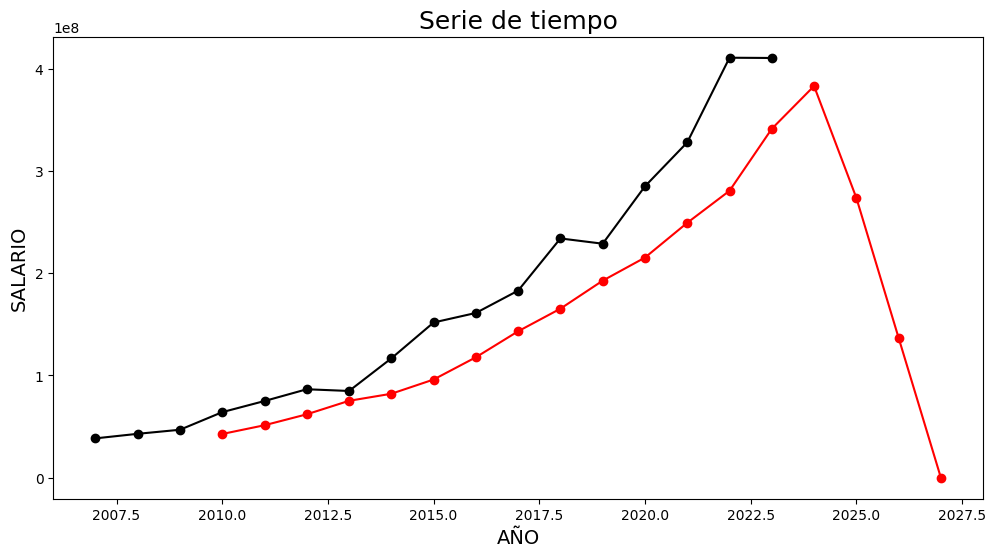

In [30]:
#Plotting 
plt.figure(figsize=(12,6))
plt.plot(anual['year'][:-4], anual['base_salary'][:-4], '-o', color='black', label='data')
plt.plot(anual['year'], anual['MA'], '-o', color='red', label='forecast')

plt.xlabel("AÑO", fontsize=14)
plt.ylabel("SALARIO", fontsize=14)
plt.title("Serie de tiempo", fontsize=18)
plt.show

El pronostico cae hasta cero ya que entre mas años predecimos menos datos tenemos como base (tenemos como medai movil, 3 años)